Importing the Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

Reading the Data Set

In [34]:
data = pd.read_csv(r"C:\Users\rahul\Downloads\adult 3.csv")

In [35]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Classifying the types in Workclass

In [36]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Classifying the types in Education

In [37]:
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [38]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

Classifying the types in Occupation

In [39]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Replacing the "?" with Others for clarification

In [40]:
data.occupation.replace({'?':'Others'},inplace=True)

In [41]:
data.workclass.replace({'?':'none'},inplace=True)

Removing the Unnecessary data items

In [42]:
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
data = data[data['education'] != 'Preschool']
data = data[data['education'] != '1st-4th']
data = data[data['education'] != '5th-6th']

Dropping the duplicate column education

In [43]:
data.drop(columns = ['education'],inplace=True)

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Convertion of categorical Variable to Numerical Values

In [45]:
data['workclass'] = encoder.fit_transform(data['workclass'])
data['marital-status'] = encoder.fit_transform(data['marital-status'])
data['occupation'] = encoder.fit_transform(data['occupation'])
data['relationship'] = encoder.fit_transform(data['relationship'])
data['race'] = encoder.fit_transform(data['race'])
data['gender'] = encoder.fit_transform(data['gender'])
data['native-country'] = encoder.fit_transform(data['native-country'])

In [46]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,2,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,2,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,6,103497,10,4,8,3,4,0,0,0,30,39,<=50K


Splitting of dataset to x,y

In [47]:
x = data.drop(columns = 'income')
y = data['income']

Transform the numerical values to decimal values (0, 1)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = encoder.fit_transform(y)

Traning the Dataset

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Creation of the Model using Gradient Boosting

In [50]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [51]:
predict = model.predict(x_test)
predict = np.round(predict)
accuracy_score(y_test,predict)

0.8622199062011464

Graph for the Predicted Salary Vs Actual Salary

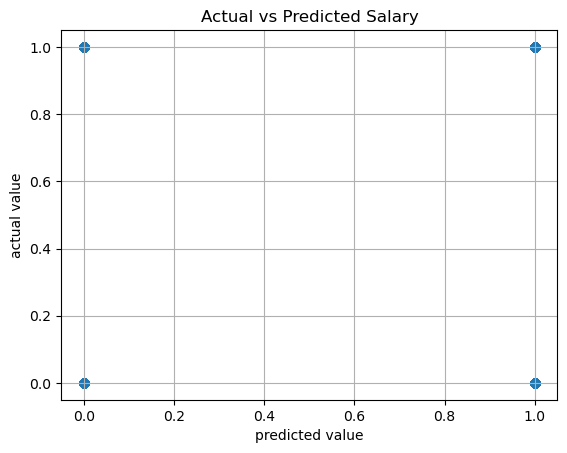

In [52]:
plt.scatter(predict,y_test)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()

In [53]:
pred = np.array([])
for i in predict:
    if i == 0:
        pred = np.append(pred,'<=50K')
    else:
        pred = np.append(pred,'>50k')
pred

array(['>50k', '<=50K', '<=50K', ..., '>50k', '<=50K', '<=50K'],
      dtype='<U32')